In [1]:
__author__ = 'Robert Nikutta, NOAO Data Lab Team'
__version__ = '20170522' # yyyymmdd

# Data Lab basic functionality - Solutions to excercises
*Robert Nikutta & the NOAO Data Lab Team*

<a class="anchor" id="imports"></a>
# Module imports & setup
Import some packages for data handling and plotting. Also import datalab code. We'll use the `helpers` module in this notebook, which hides some of the technical boilerplate.

In [2]:
# 3rd party
import pylab as p
import matplotlib
%matplotlib inline

# Datalab
from dl import helpers

# plots default setup
fontsize = 14
p.rcParams['font.size'] =  fontsize
p.rcParams['axes.labelsize'] = fontsize
p.rcParams['axes.titlesize'] = fontsize
p.rcParams['legend.fontsize'] = fontsize-2
p.rcParams['xtick.labelsize'] = fontsize
p.rcParams['ytick.labelsize'] = fontsize
p.rcParams['figure.figsize'] = (7, 5.8)

# _ /// Excercise 01: Log in with your proper credentials ///_
1. Editing the cell below, create a new `Querist` helper, using your own Data Lab username and password
2. Print the `.token` property of the helper object

In [8]:
#Q = helpers.Querist(USERNAME) # when prompted, enter password

# _/// Excercise 02: modify the query & submit it ///_

1. In the notebook cell below, modify the previous query such that in addition to the current constraints it also ensures that the number of objects per brick is 500 or more (hint: the column name for that is `nobjs` in table `bricks_dr3` in database `ls_dr3`.)

2. Submit your query and retrieve the results as a Numpy structured array.

3. Print the column names (result.dtype.names) and last 5 rows of the array (result[-5:])

In [4]:
query = """SELECT ra, dec, nobjs, nexp_g, nexp_r, nexp_z
           FROM ls_dr3.bricks_dr3
           WHERE
             (nexp_g + nexp_r + nexp_z)>0 AND
             nobjs>500
        """

result = Q(query,outfmt='structarray')
print result.dtype.names  # column names
print result[-5:]  # first 5 rows

Returning Numpy structured / record array
('ra', 'dec', 'nobjs', 'nexp_g', 'nexp_r', 'nexp_z')
[(314.580745341615, 26.75, 3294.0, 0.0, 0.0, 1.0)
 (314.860248447205, 26.75, 3458.0, 0.0, 0.0, 1.0)
 (314.790046656299, 27.0, 3708.0, 0.0, 0.0, 1.0)
 (314.648985959438, 27.25, 3485.0, 0.0, 0.0, 1.0)
 (314.929797191888, 27.25, 2909.0, 0.0, 0.0, 1.0)]


# _/// Excercise 03: compute and plot the footprint of the SMASH survey ///_

In the cell below:

1. Query the database table `smash_dr1.field` for columns `glon` & `glat` (Galactic longitude and latitude of the SMASH field centers)
2. Normalize the coordinates (glon,glat) --> (x,y) for plotting, using the helper `normalizeCoordinates()`
3. Compute clusters, feeding the argument `method='DBSCAN'` to `findClusters()`. Omit the `n_clusters` argument entirely. ('DBSCAN' needs no prior information on how many clusters to find, is more accurate, but can be much slower with large datasets; not here though)
4. Plot the outlines of the found clusters, i.e. the SMASH footprint.

Returning Numpy structured / record array
247.007001239 324.478225226


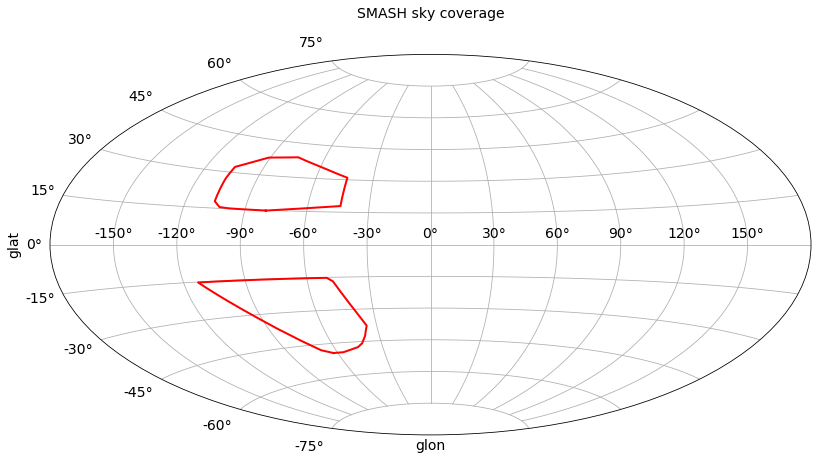

In [5]:
# 1. construct the query and submit it to the database
query = "SELECT glon,glat FROM smash_dr1.field"
result = Q(query,outfmt='structarray')

print result['glon'].min(), result['glon'].max()

# 2. normalize the glon & glat coordinates for plotting, using a helper
x, y = helpers.normalizeCoordinates(result['glon'],result['glat'])

# 3. compute clusters, using method='DBSCAN'
clusters = helpers.findClusters(x,y,method='DBSCAN') # uses default argument method='MiniBatchKMeans'

# 4. Plot the SMASH footprint, i.e. the convex hulls around clusters of SMASH field coordinates
helpers.plotSkymapScatter(x,y,clusterlabels=clusters.labels_,plot='outlines',title='SMASH sky coverage',xlabel='glon',ylabel='glat')

Yes it's L/R inverted, we're working on it :)

**Don't forget to clear your token:**

In [6]:
Q.clearToken()